<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/sketch_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sketch is an AI code-writing assistant for pandas users that understands the context of your data, greatly improving the relevance of suggestions. Sketch is usable in seconds and doesn't require adding a plugin to your IDE.

https://github.com/approximatelabs/sketch

In [1]:
! pip install sketch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.3/604.3 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00


In [2]:
import sketch
import pandas as pd

In [3]:
sales_data = pd.read_csv("https://gist.githubusercontent.com/bluecoconut/9ce2135aafb5c6ab2dc1d60ac595646e/raw/c93c3500a1f7fae469cba716f09358cfddea6343/sales_demo_with_pii_and_all_states.csv")

In [4]:
sales_data.sketch.ask("What columns might have PII information in them?")

In [5]:
sales_data.sketch.ask("Can you give me friendly names for each column? (output as an HTML list)")

In [6]:
sales_data.sketch.howto("Create some derived features from the address")

In [7]:

# Create a new column for the city
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Create a new column for the state
sales_data['State'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

# Create a new column for the zipcode
sales_data['Zipcode'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[2])


In [8]:
sales_data.sketch.howto("Get the top 5 grossing states")

In [9]:

# Get the top 5 grossing states

# Calculate total sales per state
state_sales = sales_data.groupby('State')['Price Each'].sum().reset_index()

# Sort the dataframe by total sales in descending order
state_sales = state_sales.sort_values(by='Price Each', ascending=False)

# Get the top 5 grossing states
top_5_states = state_sales.head(5)

# Print the results
print(top_5_states)


   State  Price Each
4     CA  4222370.22
42    TX  2940575.44
8     FL  2166926.57
33    NY  2070624.71
13    IL  1413911.86


In [10]:
sales_data.sketch.howto("Plot the sales per month")

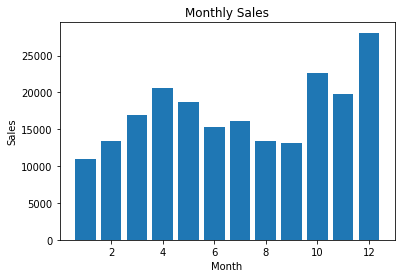

In [11]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# convert Order Date column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# create a new column for month
sales_data['Month'] = sales_data['Order Date'].dt.month

# group by month and sum the total sales for each month
monthly_sales = sales_data.groupby('Month').sum()

# plot the monthly sales data
plt.bar(monthly_sales.index, monthly_sales['Quantity Ordered'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()